# Assessment for Fundamentals of Data Analysis

The aim of this assessement is to review and interigate the tips data set using python and any packages - graphical and statistical to gain any insight into the data. The dataset is made up of customers attending a restuarnt over a number of days and all the information collected - Bill total, tip size, gender of the person paying the bill, wheather they were a smoker, the day/time of the week they attended and the number in their party. The second task was to determine wheather there is any relationship between the bill totals and the tips recieved by the servers - this analysis must take the form of a statiscal regression model.

In [2]:
# To begin we import all packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# we then import the dataset - the file is located in the same folder as the Juptyer notebook
df = pd.read_csv("tips.csv")

Without any prior knowledge of the dataset we can use the below to get snippet of the first number of entries.

In [4]:
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The colums are made up of the 
1.***total_bill*** - total cost of the meal
2.***tip*** - tip recieved by the server
3.***sex*** - the gender of the person paying for the meal
4.***smoker*** - Wheather the customer was a smoker
5.***day*** - the day of the week the customer attended the restuarnt
6.***time*** - the time of the meal
7.***size*** - the size of the party
    
We know use the ***.info()*** function to determine what colums are made up of and wheather any values are missing. We have float, objects and interager values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


After insuring all the data is present we can now start to interigate the data. We can begin by using the ***.describe()* function. This can give us an insight into the mean bill total of \\$19.79  with a standard deviation of \\$8.90. The tips mean is \\$2.99  with a standard devaiation of $1.38.

In [6]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


After reviewing the high level figures we can review the dataset further. Some outstanding questions, from the colum names, may include of the number of entries what percentage are male? smokers? when did they attended the restuarant. The below output can determine how the percentage of the 244 entries.

In [7]:
print('******************************************')
print("Sex - Percentage Breakdown of the 244 entries")
print(df['sex'].value_counts(normalize=True) * 100)
print('******************************************')
print("Smoker - Percentage Breakdown of the 244 entries")
print(df['smoker'].value_counts(normalize=True) * 100)
print('******************************************')
print("Day - Percentage Breakdown of the 244 entries")
print(df['day'].value_counts(normalize=True) * 100)
print('******************************************')
print("Meal - Percentage Breakdown of the 244 entries")
print(df['time'].value_counts(normalize=True) * 100)
print('******************************************')
print("Party Size - Percentage Breakdown of the 244 entries")
print(df['size'].value_counts(normalize=True) * 100)
print('******************************************')

******************************************
Sex - Percentage Breakdown of the 244 entries
Male      64.344262
Female    35.655738
Name: sex, dtype: float64
******************************************
Smoker - Percentage Breakdown of the 244 entries
No     61.885246
Yes    38.114754
Name: smoker, dtype: float64
******************************************
Day - Percentage Breakdown of the 244 entries
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64
******************************************
Meal - Percentage Breakdown of the 244 entries
Dinner    72.131148
Lunch     27.868852
Name: time, dtype: float64
******************************************
Party Size - Percentage Breakdown of the 244 entries
2    63.934426
3    15.573770
4    15.163934
5     2.049180
6     1.639344
1     1.639344
Name: size, dtype: float64
******************************************


Above we see the percentage of males that payed the bill was 65% and a similar percentage of 62% were non-smokers. The busyier of the four days were the Saturday (36%) and Sunday(31%) while the most populare time for a meal was Dinner at 72%. The largest percentage of the groups numbers were couples attending the restaurant together. If we look at the above analysis the most likely customer would be for a non-smoking man to pay for a meal on Saturday for dinner with another person.

Following on from the above we can manipulate the data to introduce anditonal colums. The below code will add two additional colums the first colum ***total_spent*** - this will combine the ***total_bill*** + ***tip*** giving the total money spent at the restaurant. The second colum is the ***tip_percentage*** this gives us the percentage tip of the overall spent.

In [8]:
df['total_spent'] = df['total_bill'] + df['tip']
df['tip_percentage(%)'] = round((df['tip'] / df['total_spent'])*100, 2)

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_spent,tip_percentage(%)
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,5.61
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,13.83
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,14.28
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,12.26
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,12.80


From the above we can now determine the overall average for the bill total, the tip and the average tip percentage.

In [29]:
print("The bill total average: $" + str(round(df['total_bill'].mean(),2)))
print("The bill tip average: $" + str(round(df['tip'].mean(),2)))
print("The bill tip percentage average:" + str(round(df['tip_percentage(%)'].mean(),2)) + "%")

The bill total average: $19.79
The bill tip average: $3.0
The bill tip percentage average:13.64%


Following on we can now group various combinations of the data to determine where or which group is more likely to tip big.
We start below with average tip percentage based on group size. 

In [33]:
group_size_breakdown = df.groupby(['size'])['tip_percentage(%)'].mean()
print("**** Group Size - tip_percentage(%) ****")
print(group_size_breakdown)

**** Group Size - tip_percentage(%) ****
size
1    17.590000
2    13.976859
3    13.072105
4    12.622432
5    12.152000
6    13.422500
Name: tip_percentage(%), dtype: float64


After reviewing the above a server may be fooled into thinking only serve the people come into eat on their own - however this is not the full picture as we will review below.

In [31]:
day_time_sex = df.groupby(['day', 'time', 'sex'])['total_bill','tip','tip_percentage(%)'].mean()
print("**** day_time_sex tip_percentage(%) ****")
print(day_time_sex)

**** day_time_sex tip_percentage(%) ****
                    total_bill       tip  tip_percentage(%)
day  time   sex                                            
Fri  Dinner Female   14.310000  2.810000          16.506000
            Male     23.487143  3.032857          11.498571
     Lunch  Female   13.940000  2.745000          16.565000
            Male     11.386667  1.900000          14.713333
Sat  Dinner Female   19.680357  2.801786          13.310357
            Male     20.802542  3.083898          13.020339
Sun  Dinner Female   19.872222  3.367222          15.099444
            Male     21.887241  3.220345          13.579828
Thur Dinner Female   18.780000  3.000000          13.770000
     Lunch  Female   16.648710  2.561935          13.542258
            Male     18.714667  2.980333          14.055333


Women apear to be more generous for most of the meals - with Thursday Lunch an exception. It is important to note how much they are spending. Women are spending less but giving bigger tips percentage while men are spending more and giving a smaller tips percentage. This on averge translates to more money from men in the form of tips for the servers. The same can be seen below for the smokers.

In [34]:
day_time_smoker= df.groupby(['day', 'time', 'smoker'])['total_bill','tip','tip_percentage(%)'].mean()
print("**** day_time_smoker tip_percentage(%) ****")
print(day_time_smoker)

**** day_time_smoker tip_percentage(%) ****
                    total_bill       tip  tip_percentage(%)
day  time   smoker                                         
Fri  Dinner No       19.233333  2.750000          12.236667
            Yes      19.806667  3.003333          14.034444
     Lunch  No       15.980000  3.000000          15.810000
            Yes      12.323333  2.280000          15.765000
Sat  Dinner No       19.661778  3.102889          13.549778
            Yes      21.276667  2.875476          12.646429
Sun  Dinner No       20.506667  3.167895          13.687719
            Yes      24.120000  3.516842          14.695789
Thur Dinner No       18.780000  3.000000          13.770000
     Lunch  No       17.075227  2.666364          13.720227
            Yes      19.190588  3.030000          13.987059


It is clear that the above functions and analysis can give us a good insight into the data for means and tip percentages. We can now plot the data on graphs to see how it behaves. 

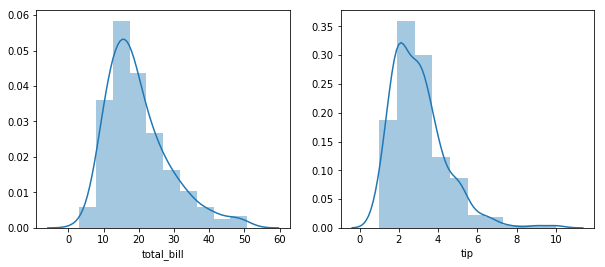

In [42]:
# Firstly we can look at the displot of the
# https://stackoverflow.com/questions/48591594/jupyter-how-to-plot-2-dfs-next-to-each-other
# I have adapted the link to plot two graphs side by side
fig, (graph1,graph2) = plt.subplots(1,2, figsize=(10,4))
sns.distplot(df['total_bill'], bins=10, ax=graph1);
sns.distplot(df['tip'], bins=10, ax=graph2);

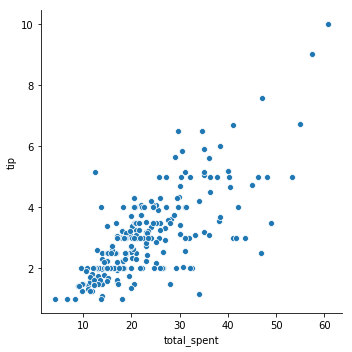

In [43]:
sns.relplot(x='total_spent', y='tip', data=df)
# sns.relplot(x='total_spent', y='tip', hue="smoker", data=df)

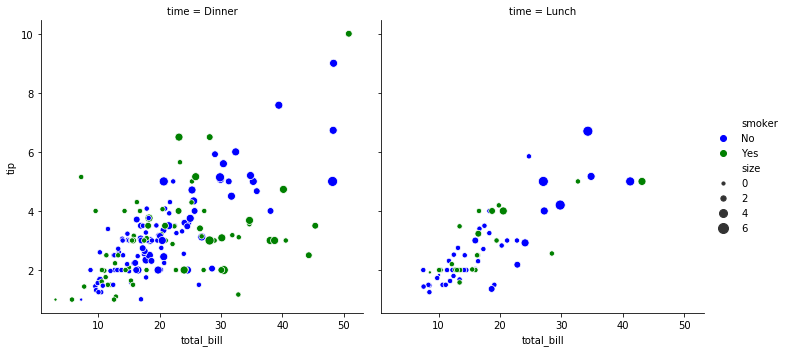

In [45]:
 g = sns.relplot(x="total_bill", y="tip", hue="smoker", size="size",palette=["b", "g"], sizes=(10, 100),col="time", data=df)

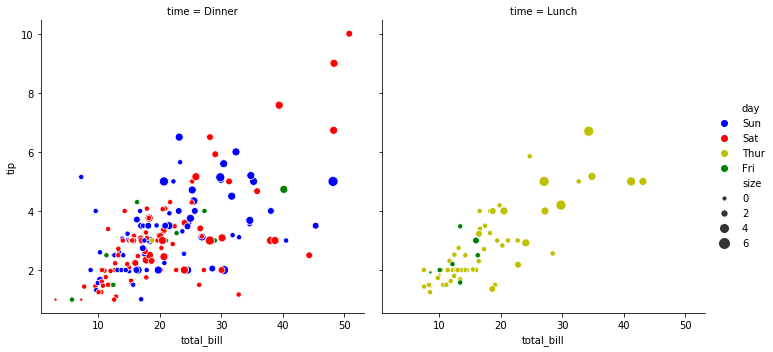

In [17]:
 g = sns.relplot(x="total_bill", y="tip", hue="day", size="size",palette=["b", "r", "y", "g"], sizes=(10, 100),col="time", data=df)

# Regression

As part of this assigment, one of the tasks was to investigate wheather there is a relationship between the total bill and tip. We can do this in many different ways plotting the data or performing calculations.

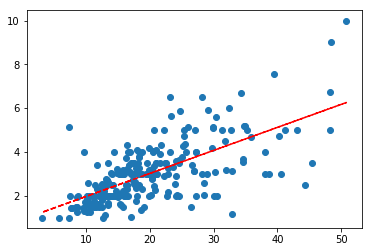

In [22]:
# The below example was adapted from the following link
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas/41635626

x=df['total_bill']
y=df['tip']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x, y)
plt.plot(x,p(x), 'r--')

C:\Users\eogha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


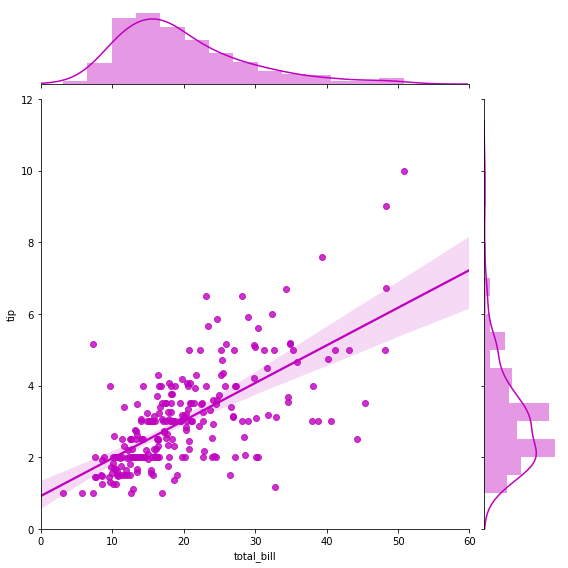

In [23]:
g = sns.jointplot("total_bill", "tip", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=8)

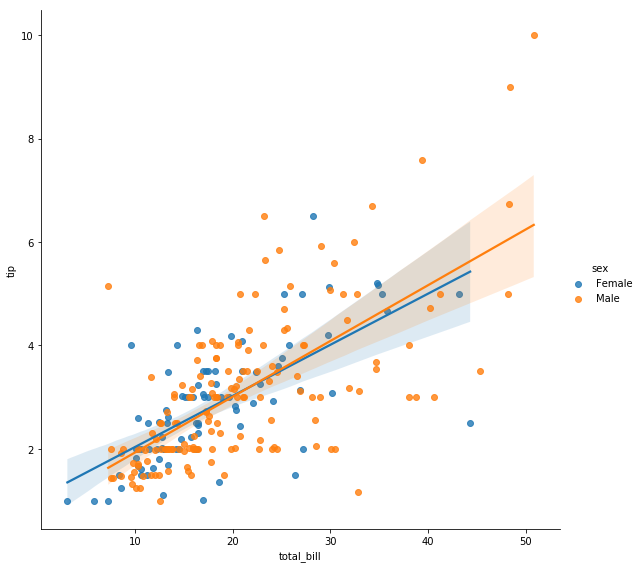

In [24]:
g = sns.lmplot(x="total_bill", y="tip", hue="sex", truncate=True, height=8, data=df)

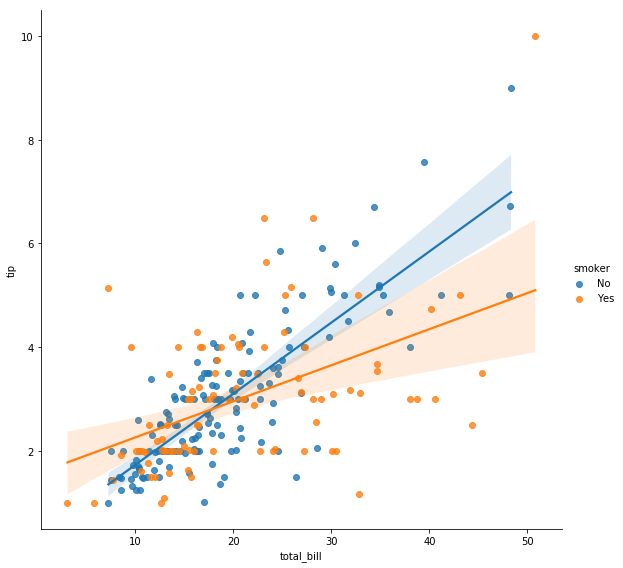

In [25]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", truncate=True, height=8, data=df)

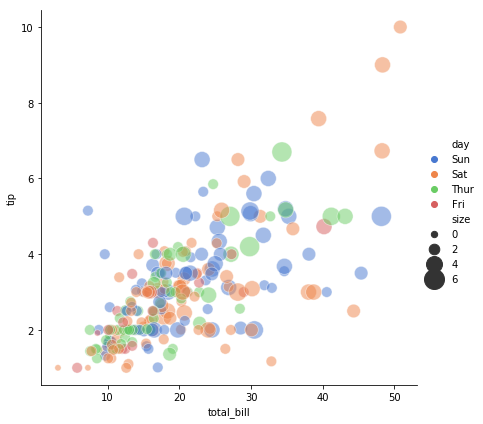

In [26]:
sns.relplot(x="total_bill", y="tip", hue="day", size="size",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

# References

1. https://stackoverflow.com/questions/50558458/pandas-percentage-by-value-in-a-column
2. https://seaborn.pydata.org/examples/scatter_bubbles.html
3. https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
4. https://seaborn.pydata.org/
5. https://matplotlib.org/
6. https://www.youtube.com/watch?v=A2XyVNXx7y8&t=17s
7. https://www.youtube.com/watch?v=ZkjP5RJLQF4
8. https://www.dictionary.com/browse/regression
9. https://www.kaggle.com/saurav9786/data-visualization-tutorial